# Multiclass Classification Model using a custom CNN in Tensorflow

## <u>Problem Statement</u>: 
### <font color=green>*To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.* </font>

### Importing all the important libraries

In [90]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
tf.__version__

'2.8.0'

### Define the path to train and test images

In [91]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/Users/ramra/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/Users/ramra/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [92]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


## Created Train & Validation Dataset with batch size of 32 / Resize images to 180 * 180

In [93]:
batch_size = 32
img_height = 180
img_width = 180

### Use 80% of the images for training, and 20% for validation.

In [94]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [95]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [96]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize one instance of all the nine classes present in the dataset

0 vascular lesion
1 nevus
2 pigmented benign keratosis
3 melanoma
4 dermatofibroma
5 actinic keratosis
6 basal cell carcinoma
7 squamous cell carcinoma
8 seborrheic keratosis


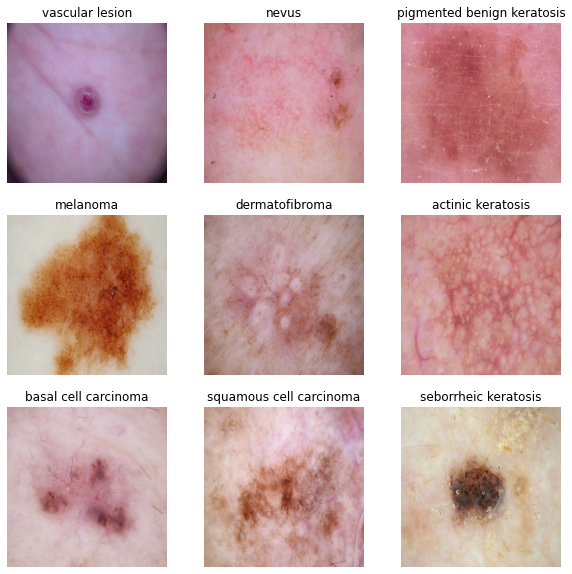

In [97]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
class_seen = []
image_count = 0
for images, labels in train_ds.take(10):
    for i in range(32):
        if class_names[labels[i]] not in class_seen:
            print(image_count, class_names[labels[i]])
            ax = plt.subplot(3, 3, image_count + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
            class_seen.append(class_names[labels[i]])
            image_count += 1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [98]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Create CNN model to detect 9 classes

In [99]:
### Your code goes here
num_classes = len(class_names)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [100]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [101]:
# View the summary of all layers
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_12 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 45, 45, 32)      

### Train the model

In [102]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 27s 428ms/step - loss: 2.0511 - accuracy: 0.1931 - val_loss: 2.0227 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 23s 415ms/step - loss: 1.9158 - accuracy: 0.2907 - val_loss: 1.9935 - val_accuracy: 0.2841
Epoch 3/20
56/56 [==============================] - 23s 415ms/step - loss: 1.7064 - accuracy: 0.3884 - val_loss: 1.6209 - val_accuracy: 0.4362
Epoch 4/20
56/56 [==============================] - 23s 418ms/step - loss: 1.5358 - accuracy: 0.4626 - val_loss: 1.5322 - val_accuracy: 0.4720
Epoch 5/20
56/56 [==============================] - 23s 419ms/step - loss: 1.4567 - accuracy: 0.4710 - val_loss: 1.4865 - val_accuracy: 0.4832
Epoch 6/20
56/56 [==============================] - 24s 421ms/step - loss: 1.3409 - accuracy: 0.5368 - val_loss: 1.4123 - val_accuracy: 0.5369
Epoch 7/20
56/56 [==============================] - 24s 427ms/step - loss: 1.3309 - accuracy: 0.5268 - val_loss: 1.5148 - val_accuracy: 0.4989

### Visualizing training results

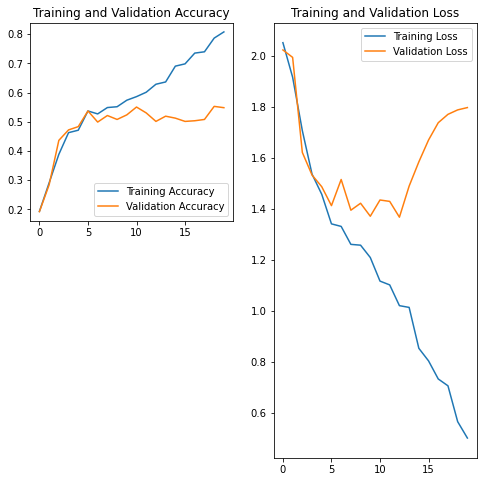

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### <u> Observations :- </u>
#### The training accuracy is over 80% but the validation accuracy is 54%
#### Similarly, the training loss is  0.5 while the validation loss is 1.79
#### The above graph also shows the same trend with Training Loss continuously reduces, but the Validation Loss starts increasing after a few epochs.

### <font color=red> The Model is overfitting the data </font>

## Data Augmentation to Resolve Overfitting

In [104]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

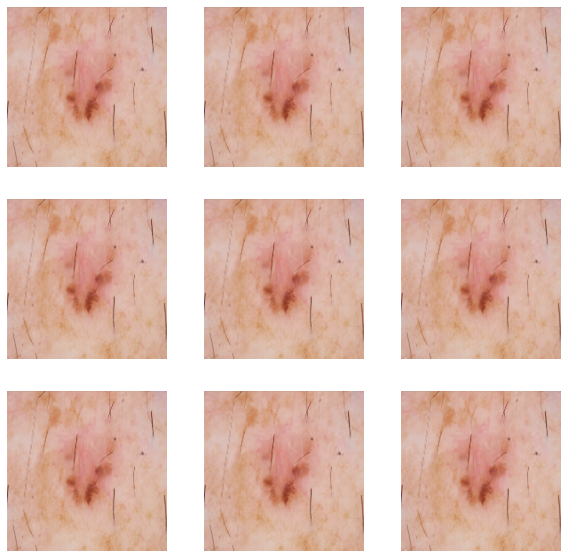

In [105]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Create CNN model with Dropout

In [106]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


### Compiling the model

In [107]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [108]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 24s 428ms/step - loss: 2.0002 - accuracy: 0.2160 - val_loss: 1.8011 - val_accuracy: 0.3333
Epoch 2/20
56/56 [==============================] - 24s 427ms/step - loss: 1.8426 - accuracy: 0.2980 - val_loss: 1.7202 - val_accuracy: 0.3736
Epoch 3/20
56/56 [==============================] - 24s 431ms/step - loss: 1.7103 - accuracy: 0.3638 - val_loss: 1.7072 - val_accuracy: 0.3803
Epoch 4/20
56/56 [==============================] - 24s 435ms/step - loss: 1.6258 - accuracy: 0.4219 - val_loss: 1.5488 - val_accuracy: 0.4609
Epoch 5/20
56/56 [==============================] - 24s 434ms/step - loss: 1.5339 - accuracy: 0.4487 - val_loss: 1.5027 - val_accuracy: 0.4765
Epoch 6/20
56/56 [==============================] - 24s 433ms/step - loss: 1.4818 - accuracy: 0.4771 - val_loss: 1.5236 - val_accuracy: 0.4832
Epoch 7/20
56/56 [==============================] - 24s 437ms/step - loss: 1.4323 - accuracy: 0.4944 - val_loss: 1.4010 - val_accuracy: 0.5101

### Visualizing the results

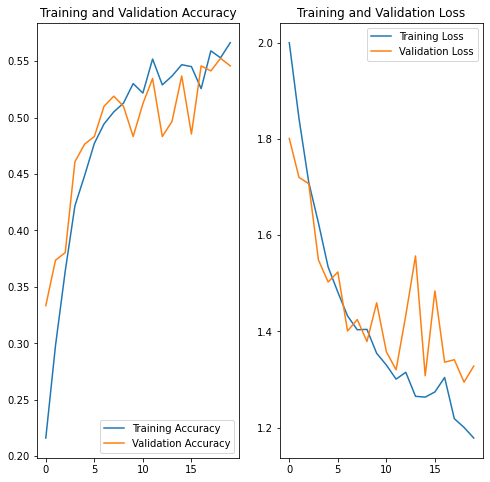

In [109]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### <u> Observations :- </u>
#### The model is no longer overfitting as much as the previous model. Slight Overfitting still exists.
#### However, the training accuracy has significantly reduced to 56.6%.
#### The validation accuracy is 54%.
#### The above graph also shows the same trend with Training Loss and Validation Loss reducing together.

### <font color=red> Overall, this model is better as overfitting has been reduced. However, it is still showing lower accuracy. </font>

## Examine the Current Class Distribution

                            count  percentage
pigmented benign keratosis    462        20.6
melanoma                      438        19.6
basal cell carcinoma          376        16.8
nevus                         357        15.9
squamous cell carcinoma       181         8.1
vascular lesion               139         6.2
actinic keratosis             114         5.1
dermatofibroma                 95         4.2
seborrheic keratosis           77         3.4


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

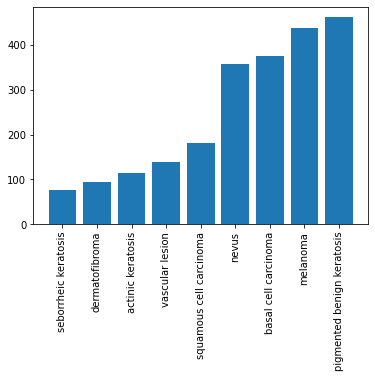

In [110]:
## Your code goes here.
class_count = {}
path_to_training_dataset="./Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
for i in class_names:
    data_dir = pathlib.Path(path_to_training_dataset + i)
    image_count = len(list(data_dir.glob('*.jpg')))
    class_count[i] = image_count

df = pd.DataFrame(class_count.values(), index=class_count.keys(), columns=['count'])
df['percentage'] = round(100 * df['count']/df['count'].sum(), 1)
print(df.sort_values(by=['count'], ascending=False))

class_count = {k: v for k, v in sorted(class_count.items(), key=lambda item: item[1])}
plt.bar(class_count.keys(), height=class_count.values())
plt.xticks(rotation=90)

### <u> Observations :- </u>

#### - Which class has the least number of samples?
- #### <font color=blue>'seborrheic keratosis' with 77 images (3.4%) </font> has the least number of sample images.
- #### <font color=blue>'dermatofibroma' (95, 4.2%), 'actinic keratosis' (114, 5.1%) and 'vascular lesion' (139, 6.2%) </font>  also have limited samples.

#### - Which classes dominate the data in terms proportionate number of samples?
- #### <font color=blue> 'pigmented benign keratosis' (462, 20.6%) and 'melanoma'(438, 19.6)</font> samples dominate the dataset.
- #### <font color=blue> 'nevus'(357, 15.9%) and 'basal cell carcinoma'(376, 16.8%)</font> also have a large proportion of samples.

## Rectify Class Imbalance using Augmentor

In [111]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [112]:
path_to_training_dataset="./Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500, multi_threaded=False) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing ISIC_0028190.jpg:   1%|          | 4/500 [00:00<00:14, 35.32 Samples/s]

Initialised with 114 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing ISIC_0027337.jpg:   1%|          | 5/500 [00:00<00:17, 28.30 Samples/s]

Initialised with 376 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing ISIC_0031799.jpg:   1%|          | 6/500 [00:00<00:14, 34.19 Samples/s]

Initialised with 95 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing ISIC_0010533.jpg:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing ISIC_0000019.jpg:   0%|          | 1/500 [00:00<01:21,  6.10 Samples/s]

Initialised with 357 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing ISIC_0024505.jpg:   1%|          | 6/500 [00:00<00:16, 29.70 Samples/s]

Initialised with 462 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing ISIC_0010977.jpg:   1%|          | 3/500 [00:00<00:21, 22.90 Samples/s]

Initialised with 77 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing ISIC_0033869.jpg:   2%|▏         | 8/500 [00:00<00:12, 38.46 Samples/s]

Initialised with 181 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing ISIC_0029099.jpg:   1%|          | 6/500 [00:00<00:14, 33.90 Samples/s]

Initialised with 139 image(s) found.
Output directory set to ./Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing ISIC_0026490.jpg: 100%|██████████| 500/500 [00:14<00:00, 34.90 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

## Class Distribution after adding new images to the original training data.

In [113]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(f'Original count of images within train/class folder: {len(path_list)}')
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(f'Total augmented images within train/class/output folder: {len(path_list_new)}')

lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
dataframe_dict = dict(zip(path_list, lesion_list))

Original count of images within train/class folder: 2239
Total augmented images within train/class/output folder: 4500


In [114]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

                            count  percentage
pigmented benign keratosis    962        14.3
melanoma                      938        13.9
basal cell carcinoma          876        13.0
nevus                         857        12.7
squamous cell carcinoma       681        10.1
vascular lesion               639         9.5
actinic keratosis             614         9.1
dermatofibroma                595         8.8
seborrheic keratosis          577         8.6


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

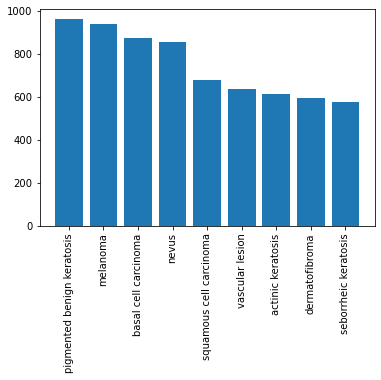

In [115]:
class_count = dict(new_df['Label'].value_counts())

df = pd.DataFrame(class_count.values(), index=class_count.keys(), columns=['count'])
df['percentage'] = round(100 * df['count']/df['count'].sum(), 1)
print(df.sort_values(by=['count'], ascending=False))

plt.bar(class_count.keys(), height=class_count.values())
plt.xticks(rotation=90)

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### <u> Observations :- </u>

#### Classes with very less samples :-
- #### <font color=blue>'seborrheic keratosis' has increased from 3.4% to 8.6% </font>
- #### <font color=blue>'dermatofibroma' has increased from 4.2% to 8.8% </font>
- #### <font color=blue>'actinic keratosis' has increased from 5.1% to 9.1%</font>
- #### <font color=blue> 'vascular lesion' has increased from 6.2% to 9.5%</font>

#### Classes dominating the data :-
- #### <font color=blue> 'pigmented benign keratosis' has reduced from 20.6% to 14.3%</font>
- #### <font color=blue> 'melanoma' has reduced from 19.6 to 13.9%</font>
- #### <font color=blue> 'basal cell carcinoma' has reduced from 16.8% to 13%</font>
- #### <font color=blue> 'nevus' has reduced from 15.9% to 12.7%</font>

### <font color=red> As can be seen, the dataset is more balanced and no class is dominating the sample dataset.</font>

## Train the model on the data created using Augmentor

In [116]:
batch_size = 32
img_height = 180
img_width = 180

###  Create a training dataset

In [117]:
data_dir_train = pathlib.Path("./Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Create a validation dataset

In [118]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Create CNN model (including normalization)

In [119]:
## your code goes here
model = Sequential([
  data_augmentation,
#   layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile your model (Choose optimizer and loss function appropriately)

In [120]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [121]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_14 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_46 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_20 (Bat  (None, 90, 90, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_47 (Conv2D)          (None, 90, 90, 32)      

### Train your model

In [122]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 80s 465ms/step - loss: 1.6881 - accuracy: 0.4015 - val_loss: 6.2123 - val_accuracy: 0.1099
Epoch 2/30
169/169 [==============================] - 78s 461ms/step - loss: 1.3220 - accuracy: 0.5076 - val_loss: 6.2042 - val_accuracy: 0.1247
Epoch 3/30
169/169 [==============================] - 74s 437ms/step - loss: 1.2045 - accuracy: 0.5425 - val_loss: 1.6266 - val_accuracy: 0.4328
Epoch 4/30
169/169 [==============================] - 74s 436ms/step - loss: 1.0966 - accuracy: 0.5797 - val_loss: 1.7070 - val_accuracy: 0.4410
Epoch 5/30
169/169 [==============================] - 74s 435ms/step - loss: 1.0418 - accuracy: 0.6024 - val_loss: 2.0919 - val_accuracy: 0.3987
Epoch 6/30
169/169 [==============================] - 74s 436ms/step - loss: 1.0011 - accuracy: 0.6128 - val_loss: 1.1911 - val_accuracy: 0.5561
Epoch 7/30
169/169 [==============================] - 74s 436ms/step - loss: 0.9525 - accuracy: 0.6384 - val_loss: 1.6843 - val_ac

###  Visualize the model results

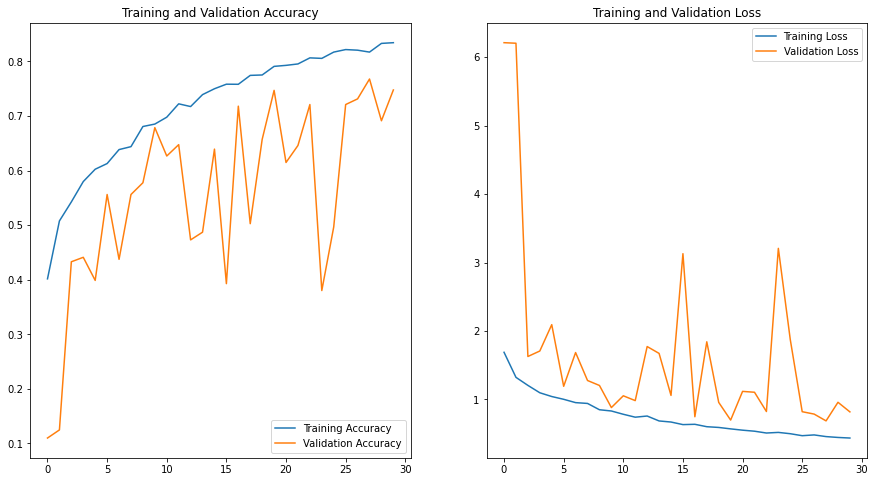

In [123]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## <u> Observations</u> :- 

- ### <font color=green>The training accuracy has increased to 83% from 56%. </font>
- ### <font color=green>The final validation accuracy has increased to 74%. Without rebalancing, it was 54%.</font>

## <u> Conclusion</u> :-
- ### <font color=red>The results indicate that the class rebalance has helped to improve the results.</font>
- ### <font color=red>After class rebalance, the model is more accurate.</font>
- ### <font color=red>The model is not overfitting or underfitting the data.</font>